# Introduction 

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?


# Data Sources

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

# Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

# Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

# Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 


# Import Python modules

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data...

In [2]:
odf = pd.read_csv("observations.csv")

print("\n\n\n------Observations Data Frame------------------------------")
print("-----------------------------------------------------------")
odf.info()
print(odf.head(10))

sdf = pd.read_csv("species_info.csv")
print("\n\n\n------Species Data Frame-----------------------------------")
print("-----------------------------------------------------------")
sdf.info()
print(sdf.head())




------Observations Data Frame------------------------------
-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virg

# Cleaning Data

In [3]:
#sdf['conservation_status'] = sdf.conservation_status.isnull
#odf.drop_duplicates()
#sdf.drop.duplicates()
dup = odf.duplicated()
print("These are the duplicated records in Observations\n{}".format(dup.value_counts()))
print("-----------------------------------------------------------")

dup = sdf.duplicated()
print("\nThese are the duplicated records in Species\n{}".format(dup.value_counts()))
print("-----------------------------------------------------------")


print("\nDeleting duplicates")
print("-----------------------------------------------------------")
print("\nLenght before dropping duplicates ->", len(odf))
odf.drop_duplicates(inplace=True)
print("\nLenght after dropping duplicates ->", len(odf))

#print("\nFilling 'Nan' with the word 'None'")
#print("-----------------------------------------------------------")

#sdf = sdf.fillna(
#  value={'conservation_status':'None'}
#)
#print("\nAfter the filling with the word 'None'")
#print("-----------------------------------------------------------")
#print(sdf.head())

print("\nPrinting categories...")
print("-----------------------------------------------------------")

print(sdf.category.unique())

print("\nCreating datatype categorical...")
print("-----------------------------------------------------------")
categories = ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']
sdf.category = pd.Categorical(sdf.category, categories, ordered = False)

print("\nPrinting data type of Category...")
print("-----------------------------------------------------------")
print(type(sdf.category))

print("\nPrinting mean of categories, using cat codes")
print("-----------------------------------------------------------")

index_category = np.mean(sdf.category.cat.codes)
print(index_category)
print("\nTesting the new numeric categories--->> The mean category is->{mean_cat}".format(mean_cat=categories[int(index_category)]))
print("-----------------------------------------------------------")
print("\nSpecies info ------")
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")
print(sdf.info())

These are the duplicated records in Observations
False    23281
True        15
dtype: int64
-----------------------------------------------------------

These are the duplicated records in Species
False    5824
dtype: int64
-----------------------------------------------------------

Deleting duplicates
-----------------------------------------------------------

Lenght before dropping duplicates -> 23296

Lenght after dropping duplicates -> 23281

Printing categories...
-----------------------------------------------------------
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Creating datatype categorical...
-----------------------------------------------------------

Printing data type of Category...
-----------------------------------------------------------
<class 'pandas.core.series.Series'>

Printing mean of categories, using cat codes
-----------------------------------------------------------
4.425652472527473

Testing the new numeric categ

## Reagroup data in Observations Data Frame

As we can observe, there are many records of the same species but with different number of observations.

In [4]:
canis_lupus = odf[(odf.scientific_name == 'Canis lupus') & (odf.park_name == 'Bryce National Park')]
print(canis_lupus.head())
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")
print()



     scientific_name            park_name  observations
1766     Canis lupus  Bryce National Park            27
7346     Canis lupus  Bryce National Park            29
9884     Canis lupus  Bryce National Park            74
-----------------------------------------------------------
-----------------------------------------------------------



Reagrupamos y creamos otro data frame

In [5]:
print("\nLenght old data frame ->", len(odf))

new_odf = odf.groupby(['scientific_name', 'park_name']).observations.sum().reset_index()
print('\nNew Observations Data Frame ----->>>')

print("\nLenght new data frame ->", len(new_odf))

canis_lupus = new_odf[(new_odf.scientific_name == 'Canis lupus') & (new_odf.park_name == 'Bryce National Park')]
print("\nNew canis lupus---------------")
print("-----------------------------------------------------------")
print(canis_lupus.head())
print("-----------------------------------------------------------")



Lenght old data frame -> 23281

New Observations Data Frame ----->>>

Lenght new data frame -> 22164

New canis lupus---------------
-----------------------------------------------------------
     scientific_name            park_name  observations
3216     Canis lupus  Bryce National Park           130
-----------------------------------------------------------


Now we have regrouped the data frame, and we have only one record for the Canis Lupus Species

## Cleaning Species Data Frame

In [6]:
canis_lupus = sdf[sdf.scientific_name == 'Canis lupus']
print("\nSample of a various records of the Canis Lupus Species.\nWe can see there are several records of the same species but different status and common name.")
print("\n",canis_lupus)


print("\n So we're gonna create a new clean species data frame")
print("-------------------------------------------------------")


sdf2 = sdf[['category', 'scientific_name','conservation_status']]
print('\nHere we got the new data frame without the common name column.\n')
print(sdf2.info())

print("\nLenght of new species data frame before dropping-->", len(sdf2))
print("\nDroping duplicates over new species ...")
#sdf2.drop_duplcates(subset=['brand', 'style'], keep='last')
sdf2 = sdf2.drop_duplicates(subset=['category', 'scientific_name'], keep='first')
print("\nLenght of new species after dropping-->", len(sdf2))


print("\nCanis Lupus after droping-->>\n", sdf2[sdf2.scientific_name == 'Canis lupus'])
print("-----------------------------------------------------------")


Sample of a various records of the Canis Lupus Species.
We can see there are several records of the same species but different status and common name.

      category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered

 So we're gonna create a new clean species data frame
-------------------------------------------------------

Here we got the new data frame without the common name column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             5824 non-null   category
 1   scientific_name      5824 non-null   object  
 2   conservation_status  191 non-null    object  
dtypes: category(1), object(2)
memory usa

# Analysis

## What is the distribution of conservation status for species?

Value counts sdf->>
 Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

Value counts sdf2->>
 Species of Concern    151
Endangered             15
Threatened              9
In Recovery             3
Name: conservation_status, dtype: int64


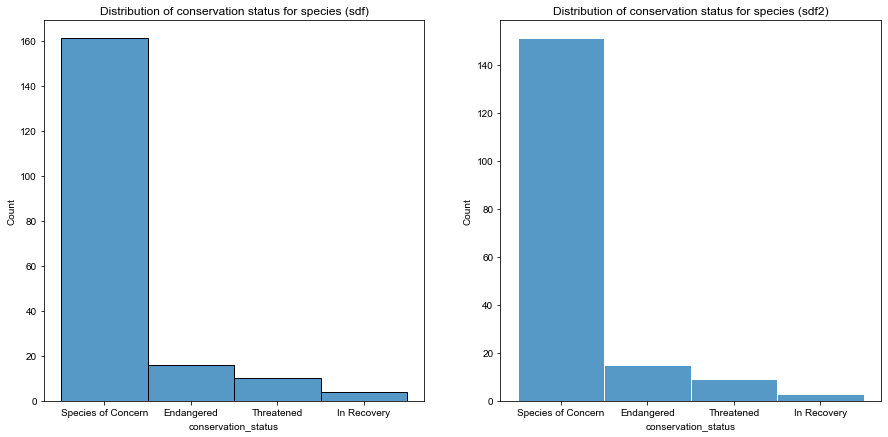


Lenght of endangered specie sdf-> 16

Lenght of endangered specie sdf2-> 15


<Figure size 432x288 with 0 Axes>

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))


print("Value counts sdf->>\n",sdf.conservation_status.value_counts())
print("\nValue counts sdf2->>\n",sdf2.conservation_status.value_counts())

#Plot with the old Species data frame
sns.histplot(sdf.conservation_status, kde=False, ax=axs[0])
sns.set_style("whitegrid")
axs[0].grid(False, axis = 'x')
axs[0].set_title("Distribution of conservation status for species (sdf)" )
#plt.savefig("Distribtion_Status_Species.png")

#Plot with the new Species data frame
axs[1].set_title("Distribution of conservation status for species (sdf2)" )
sns.histplot(sdf2.conservation_status, kde=False, ax=axs[1])

plt.savefig('Distr_conservation.png')

plt.show()
plt.clf()

endangered_specie = sdf[sdf.conservation_status == 'Endangered']
print("\nLenght of endangered specie sdf->",len(endangered_specie))
endangered_specie = sdf2[sdf2.conservation_status == 'Endangered']
print("\nLenght of endangered specie sdf2->",len(endangered_specie))

## Are certain types of species more likely to be endangered?

In [8]:
print("\nThese are the especies more like to be endangered-->\n", endangered_specie.scientific_name)


These are the especies more like to be endangered-->
 8                        Canis lupus
9                        Canis rufus
34                 Myotis grisescens
39                    Myotis sodalis
72      Glaucomys sabrinus coloratus
173                   Grus americana
276              Vermivora bachmanii
343                Picoides borealis
540             Etheostoma percnurum
570                  Noturus baileyi
2497                   Geum radiatum
3275               Chasmistes liorus
4446         Ovis canadensis sierrae
4505         Gymnogyps californianus
4601                    Rana sierrae
Name: scientific_name, dtype: object


## Are the differences between species and their conservation status significant?

The `species` variable is: `categorical nominal`
The `conservation_status` variable is: `categorical`.
We're going to make a `Chi-Square Test`

In [9]:
from scipy.stats import chi2_contingency

table = pd.crosstab(sdf2.scientific_name, sdf2.conservation_status)
#print(table)

# run Chi-Square test and print p-value
chi2, pval, dof, expected = chi2_contingency(table)
print('-------')
print("The pval is ->", pval)
# determine significance
print("The differences between species and their conservation estatus are not significant!")


-------
The pval is -> 0.45527924478334036
The differences between species and their conservation estatus are not significant!


## Which animal is most prevalent and what is their distribution amongst parks?

These are the most prevalent species along all the parks -> 
 Castor canadensis       12
Canis lupus             12
Hypochaeris radicata    12
Procyon lotor           12
Holcus lanatus          12
Myotis lucifugus        12
Columba livia           12
Puma concolor           12
Name: scientific_name, dtype: int64


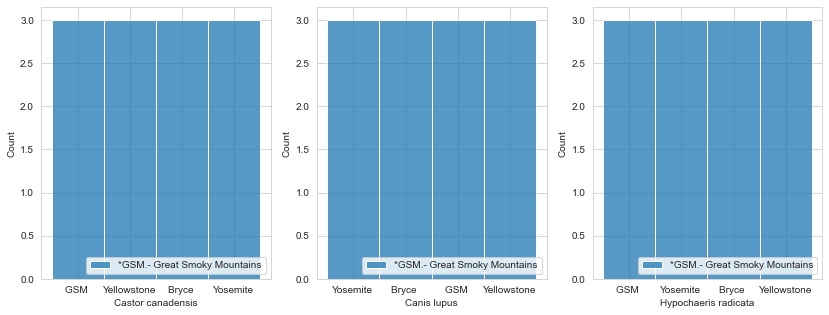

<Figure size 432x288 with 0 Axes>

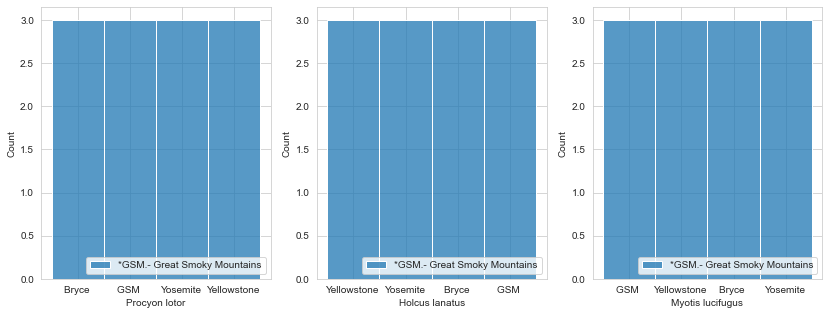

<Figure size 432x288 with 0 Axes>

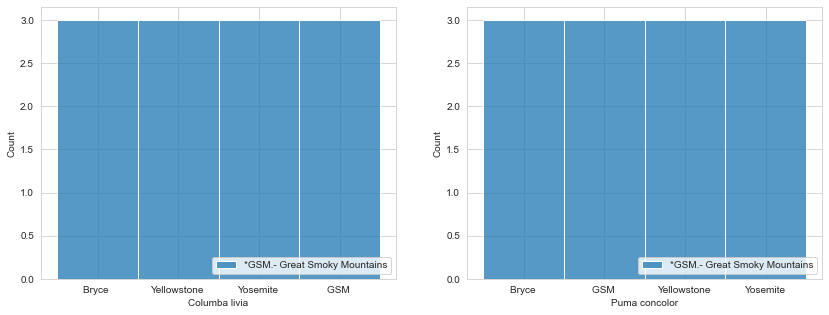

<Figure size 432x288 with 0 Axes>

In [18]:
import re
#we create a copy of the original observations DF 
odf_prevalent = odf
#we rename the names of the parks

prevalent  = odf_prevalent.scientific_name.value_counts()
prev_species = prevalent[prevalent.values == 12]
print("These are the most prevalent species along all the parks -> \n",prev_species)

odf_prevalent = odf_prevalent.replace(to_replace ='National Park', value = '', regex = True).replace(to_replace ='Great Smoky Mountains', value = 'GSM', regex = True)

#We get the records for the prevalent species
prev_1 = odf_prevalent[odf_prevalent.scientific_name == 'Castor canadensis']
prev_2 = odf_prevalent[odf_prevalent.scientific_name == 'Canis lupus']
prev_3 = odf_prevalent[odf_prevalent.scientific_name == 'Hypochaeris radicata']
prev_4 = odf_prevalent[odf_prevalent.scientific_name == 'Procyon lotor']
prev_5 = odf_prevalent[odf_prevalent.scientific_name == 'Holcus lanatus']
prev_6 = odf_prevalent[odf_prevalent.scientific_name == 'Myotis lucifugus']
prev_7 = odf_prevalent[odf_prevalent.scientific_name == 'Columba livia']
prev_8 = odf_prevalent[odf_prevalent.scientific_name == 'Puma concolor']






#Row 1
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].set_xlabel('Castor canadensis')
axs[1].set_xlabel('Canis lupus')
axs[2].set_xlabel('Hypochaeris radicata')
sns.histplot(x='park_name',data=prev_1, ax=axs[0])
sns.histplot(x='park_name',data=prev_2, ax=axs[1])
sns.histplot(x='park_name',data=prev_3, ax=axs[2])


axs[0].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")
axs[1].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")
axs[2].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")


plt.savefig('Prevalents1.png')
plt.show()
plt.clf()




#Row 2
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].set_xlabel('Procyon lotor')
axs[1].set_xlabel('Holcus lanatus')
axs[2].set_xlabel('Myotis lucifugus')
sns.histplot(x='park_name',data=prev_4, ax=axs[0])
sns.histplot(x='park_name',data=prev_5, ax=axs[1])
sns.histplot(x='park_name',data=prev_6, ax=axs[2])


axs[0].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")
axs[1].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")
axs[2].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")

plt.savefig('Prevalents2.png')
plt.show()
plt.clf()



#Row 3
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].set_xlabel('Columba livia')
axs[1].set_xlabel('Puma concolor')
sns.histplot(x='park_name',data=prev_7, ax=axs[0])
sns.histplot(x='park_name',data=prev_8, ax=axs[1])


axs[0].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")
axs[1].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")
#axs[0,2].legend(["*GSM.- Great Smoky Mountains"],loc="lower right")

plt.savefig('Prevalents3.png')
plt.show()
plt.clf()



#plt.subplots_adjust(hspace=0.50)


# Conclusions

We can conclude that the most prevalent species are 12 trroghtout all the national parks. Also there are 16 endangered species.
We did'nt spect this results.